<a href="https://colab.research.google.com/github/mustafabozkaya/PythonDataScienceHandbooks/blob/main/image_handle/%C4%B0mage_Processing_with_PIL_and_rembg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **İmage Processing with PIL and rembg**

## Installation

In [2]:
!pip install -q --upgrade pip

!pip install -q rembg

!pip install --upgrade Pillow

     |████████████████████████████████| 2.1 MB 8.4 MB/s 
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 57.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 70.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 82.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7

In [3]:
!curl http://ai.stanford.edu/~jkrause/car196/cars_train.tgz

In [4]:
!pwd

/content


In [5]:
import pandas as pd 
import numpy as np
import PIL as pil
import rembg as re
import matplotlib.pyplot as plt


In [6]:
df=pd.read_csv("./sample_data/mnist_train_small.csv")
df.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.shape


(19999, 785)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Columns: 785 entries, 6 to 0.590
dtypes: int64(785)
memory usage: 119.8 MB


In [14]:
df.shape

(19999, 785)

In [10]:
df.columns

Index(['6', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       ...
       '0.581', '0.582', '0.583', '0.584', '0.585', '0.586', '0.587', '0.588',
       '0.589', '0.590'],
      dtype='object', length=785)

In [12]:
df.nunique()

6        10
0         1
0.1       1
0.2       1
0.3       1
         ..
0.586     3
0.587     1
0.588     1
0.589     1
0.590     1
Length: 785, dtype: int64

In [15]:
img=df.iloc[45,1:]
label=df.iloc[45,0]

In [17]:
img.shape

(784,)

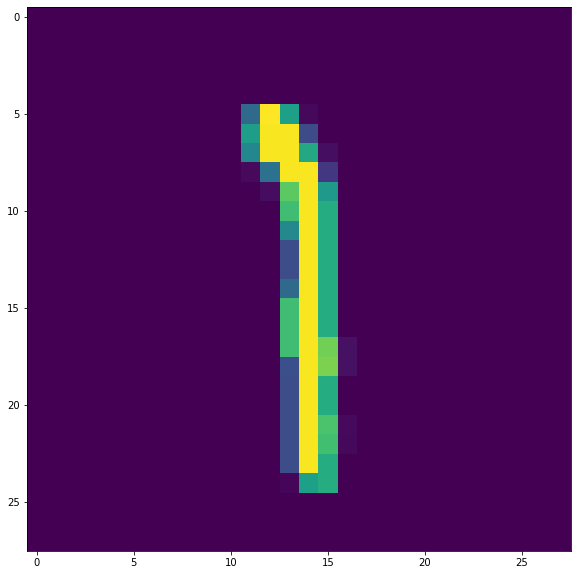

In [18]:
plt.figure(figsize=(12,10))
plt.imshow(img.values.reshape((28,28)))